(digital)=
# Messsignale digitalisieren

## Lernziele für den Abschnitt *Messsignale digitalisieren*

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><b>Lernziele für den Abschnitt:</b></div>
    <ul>
        <li> Effekte der Digitalisierung von Messsignalen verstehen </li>
        <li> mithilfe von Grundbegriffen und Berechnungen </li>
        <li> um die Auswirkung auf Messergebnisse zu bewerten </li>
    </ul>
</div>

## python konfigurieren

### Module importieren

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import schemdraw
import schemdraw.elements as elm
import numpy as np
import scipy
from scipy.stats import norm
import pandas as pd
import locale
import distutils.spawn
from distutils.spawn import find_executable
import IPython.display
from IPython.display import display, Latex, IFrame

print('matplotlib', matplotlib.__version__)
print('numpy', np.__version__)
print('scipy', scipy.__version__)
print('pandas', pd.__version__)
print('locale', locale)
print('distutils.spawn', distutils.spawn)
print('IPython.display', IPython.display)
print('schemdraw', schemdraw.__version__)

matplotlib 3.7.1
numpy 1.24.2
scipy 1.10.1
pandas 1.5.3
locale <module 'locale' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/sen/lib/python3.10/locale.py'>
distutils.spawn <module 'distutils.spawn' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/sen/lib/python3.10/site-packages/setuptools/_distutils/spawn.py'>
IPython.display <module 'IPython.display' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/sen/lib/python3.10/site-packages/IPython/display.py'>
schemdraw 0.15


### Grafikparameter einstellen

In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
locale.setlocale(locale.LC_ALL, '')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.set_option('display.latex.repr', True)
    pd.set_option('display.latex.longtable', True)

## Messwertverarbeitung

Rohdaten = Sensorsignale
- z. B. Spannung $U(T)$
- z. B. Strom $I(\text{Einstrahlung})$
- ...

Wie werden Sensorsignale aufbereitet und in Systemen nutzbar gemacht?

Welche Eigenschaften haben Messwertübertragungssysteme?

Welche Kenngrößen helfen bei der Einschätzung von Signalen?

Wann hilft es, Signale im Frequenzbereich zu betrachten?

Was kann der Frequenzbereich?

## Analoge vs. Diskrete zeitlich kontinuierliche Messsignale

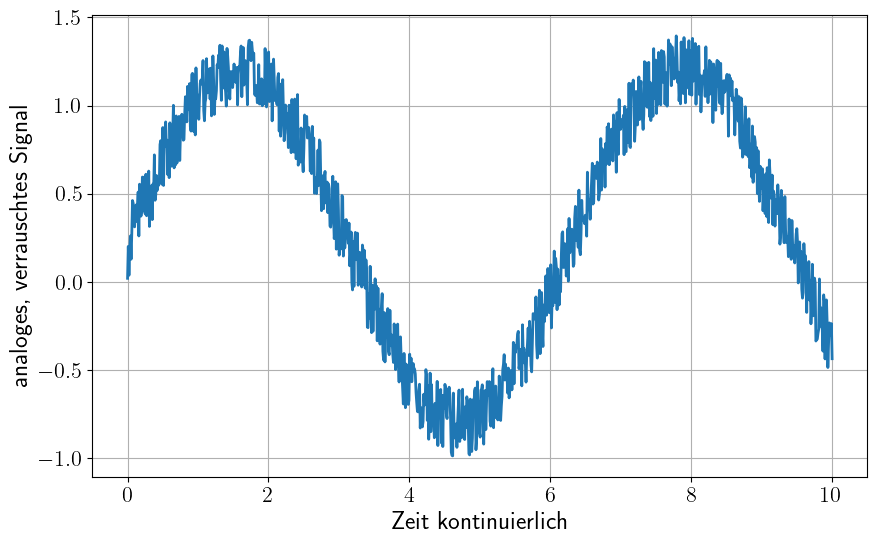

In [12]:
t = np.linspace(0,10,1000)
analog = np.sin(t) + 0.4*np.random.rand(len(t))
plt.plot(t,analog)
plt.xlabel('Zeit kontinuierlich')
plt.ylabel('analoges, verrauschtes Signal')
plt.grid()
plt.show()

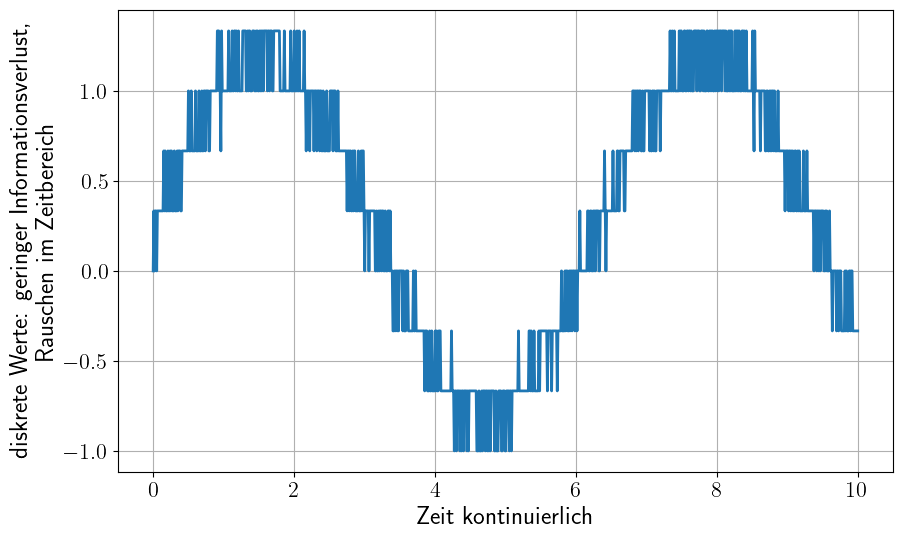

In [13]:
diskret = np.round(3*analog)/3
plt.plot(t,diskret)
plt.xlabel('Zeit kontinuierlich')
plt.ylabel('diskrete Werte: geringer Informationsverlust, \nRauschen im Zeitbereich')
plt.grid()
plt.show()

## Analoge vs. diskrete zeitlich diskontinuierliche Messsignale

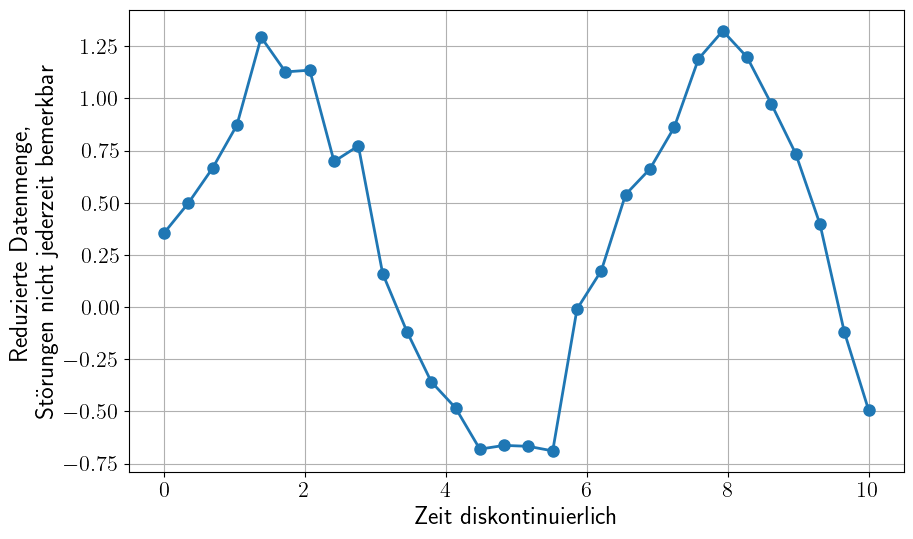

In [16]:
td = np.linspace(0,10,30)
analog = np.sin(td) + 0.4*np.random.rand(len(td))
plt.plot(td,analog,'-o')
plt.xlabel('Zeit diskontinuierlich')
plt.ylabel('Reduzierte Datenmenge, \nStörungen nicht jederzeit bemerkbar')
plt.grid()
plt.show()

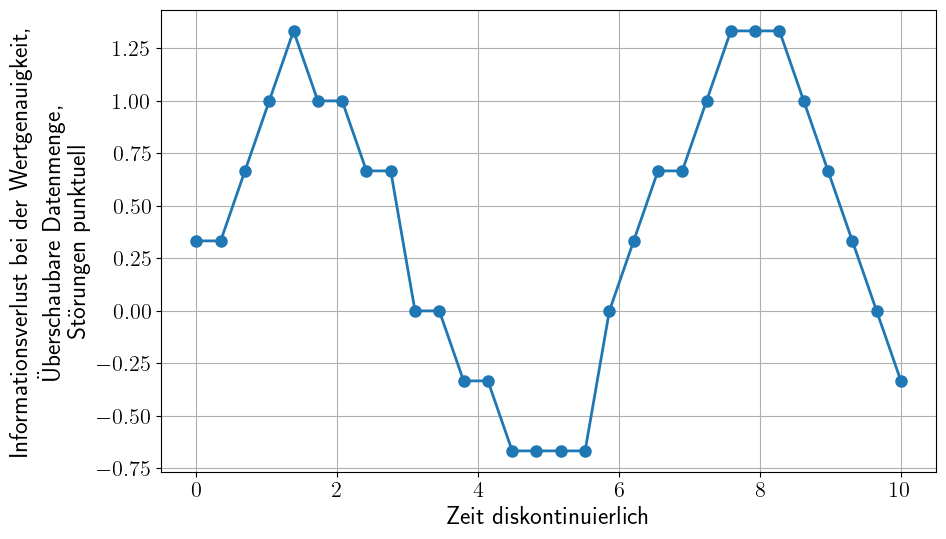

In [18]:
diskret = np.round(3*analog)/3
plt.plot(td,diskret,'-o')
plt.xlabel('Zeit diskontinuierlich')
plt.ylabel('Informationsverlust bei der Wertgenauigkeit, \nÜberschaubare Datenmenge, \nStörungen punktuell')
plt.grid()
plt.show()

## Determinierte vs. stochastische Messsignale

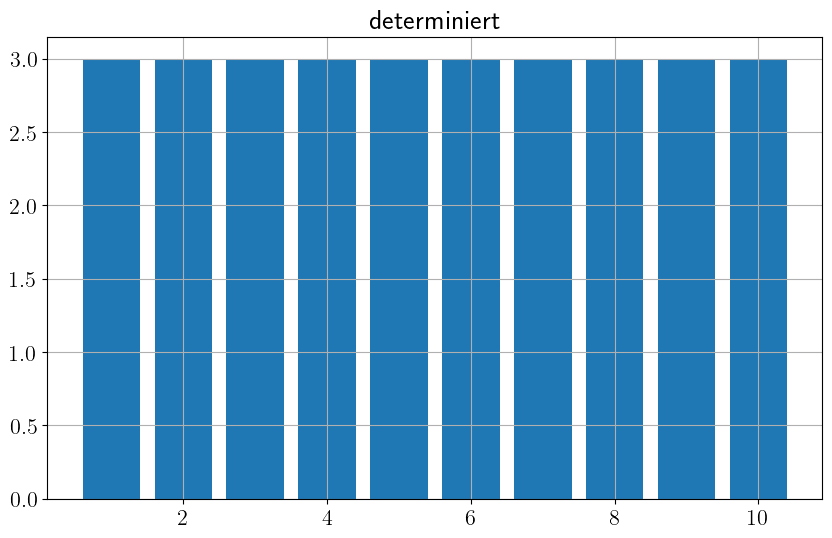

In [26]:
inputsignal = np.ones(10)
konstante = 3
determiniert = konstante*inputsignal
plt.bar(np.linspace(1,10,10),determiniert)
plt.title('determiniert')
plt.grid()
plt.show()

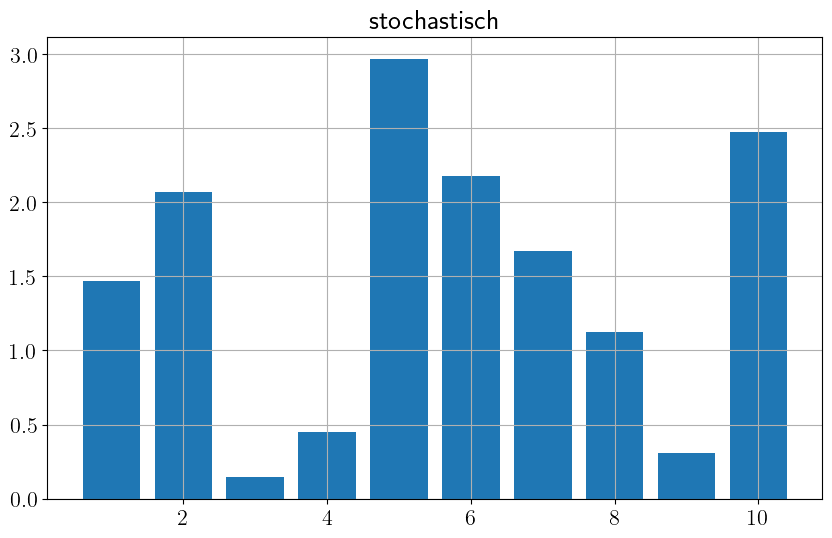

In [27]:
stochastisch = konstante*np.random.rand(len(inputsignal))
plt.bar(np.linspace(1,10,10),stochastisch)
plt.title('stochastisch')
plt.grid()
plt.show()

## Klassifizierung von Messsignalen

| **Signalcharakteristik** | **Informationsparameter** | **Vorteil** | **Nachteil** |
|---|---|---|---|
| **analog** {cite:p}`parthier_messtechnik:_2016` | beliebig viele Werte im Wertebereich | proportionale Abbildung zwischen Messsignal und Informationsparameter | einfach zu stören, z. B. durch externe Störsignale, Rauschen, Temperaturdrift, etc. |
| **diskret** | $n$ Werte im Wertebereich | Störeinflüsse machen sich erst nach Überschreiten von Grenzwerten bemerkbar | bei Abbildung analoger Messwerte auf diskreten Informationsparameter Verlust von Information |
| **kontinuierlich** | zu beliebigem Zeitpunkt änderbar | jederzeit ist der zeitliche Verlauf von Messungen verfolgbar | Störungen jederzeit wirksam, Informationsmenge oft unnötig groß |
| **diskontinuierlich** | nur zu diskreten Zeitpunkten änderbar | Störungen zwischen den Zeitpunkten der Parameteränderungen können sich nicht auswirken | Informationen stehen nur zu diskreten Zeitpunkten zur Verfügung |
| **determiniert** | determiniert | Information mit einmaliger Messung gewinnbar | Information kann durch Störung unbrauchbar werden |
| **stochastisch** | stochastische Größe | Störungen machen sich nur stark reduziert bemerkbar, sie werden über die Messzeit integriert | Information ist erst mit mehrmaligen Messungen zu gewinnen, ggf. großer Zeitbedarf |

## Vom Sensorsignal zum Messsignal

Das Sensorsignal wird über verschiedene Stufen verarbeitet {cite:p}`schmidt_sensorschaltungstechnik_2007`

Jede Stufe kann die Genauigkeit beeinflussen

| **Analoge Signalvorverarbeitung** | **Analog-Digital-Umsetzung** | **Digitale Signalverarbeitung** |
|---|---|---|
| Verstärkung | Digitalisierung | Mittelwert- / Grenzwertbildung |
| Offset- / Driftkompensation | Codierung | Arithmetische Operationen |
| Temperaturgang-Kompensation | Einstellung Umsetzungsbreite | Interpolation |
| Linearisierung | Einstellung Umsetzzeiten | Datenreduktion |
| Frequenzgang-Kompensation | | Datenklassifikation |
| Rausch- / Störsignalunterdrückung | | Gradiententest |
| Hysteresekorrektur | | Dynamikkorrektur |
| | | Speicherung Daten |
| | | Sensorfunktionstest |
| | | Plausibilitätskontrolle |
| | | Fehlerkorrektur |

## Informationsparameter und Signalformen wandeln

auch bei einfachsten Messungen: Wandlung des aus der Umwelt gewonnenen Messsignals in eine für den Menschen interpretierbare Form (Informationsparameter), z. B. Quecksilberthermometer: Skala + Flüssigkeitsfarbe {cite:p}`parthier_messtechnik:_2016`

Unterscheidung bei Wandlungsstufen in der Messkette: Wandlung von Signalform **oder** Informationsparameter

- Wandlung der Signalform: z. B. Messverstärker $\to$ Informationsparameter bleibt Amplitude des Signals
- Wandlung des Informationsparameters: z. B. elektrische Spannung $\to$ Winkeländerung Zeigerausschlag am Anzeigegerät oder Amplitude $\to$ Frequenz (unempfindlicher gegen Störeinflüsse, einfacher digitalisierbar)

## Frequenz als Informationsparameter

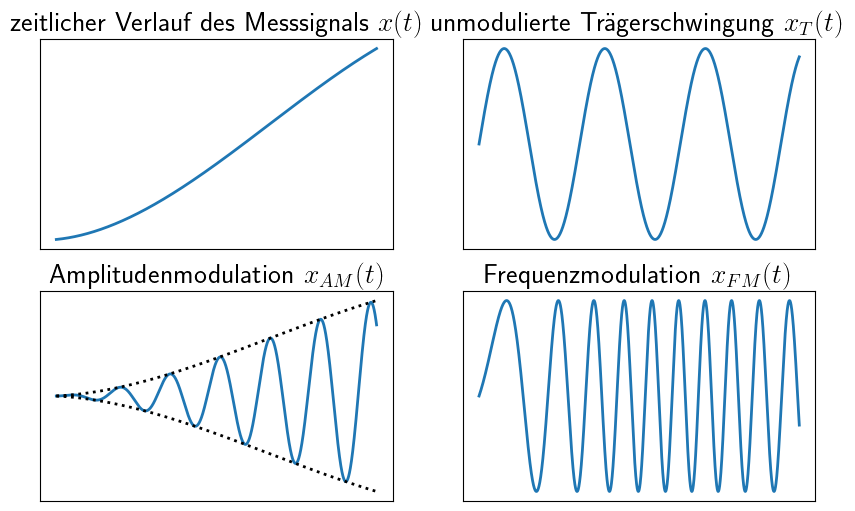

In [74]:
t = np.linspace(0,10,10000)
x = t + t**2 - 0.05*t**3
xt = np.sin(2*t)
xam = x*modu
xfm = np.sin(x)
ax1 = plt.subplot(221)
ax1.plot(t,x)
ax1.set_title(r'zeitlicher Verlauf des Messsignals $x(t)$')
ax1.set_xticks([])
ax1.set_yticks([])
ax2 = plt.subplot(222,sharex=ax1)
ax2.plot(t,xt)
ax2.set_title(r'unmodulierte Trägerschwingung $x_T(t)$')
ax2.set_yticks([])
ax3 = plt.subplot(223,sharex=ax1)
ax3.plot(t,xam)
ax3.set_title(r'Amplitudenmodulation $x_{AM}(t)$')
ax3.plot(t,x,'k:')
ax3.plot(t,-x,'k:')
ax3.set_yticks([])
ax4 = plt.subplot(224,sharex=ax1)
ax4.plot(t,xfm)
ax4.set_title(r'Frequenzmodulation $x_{FM}(t)$')
ax4.set_yticks([])
plt.show()

weitere Möglichkeit: Phasenmodulation (PM) = Verschiebung des Nullphasenwinkels

![signal](../img/signal-digital.png)

## Digitale Signale aus A/D-Wandlung

Analoge Signale haben per Definition einen unendlich großen Wertevorrat $\to$ im Rechner nicht verarbeitbar $\to$ Notwendigkeit Digitalisierung {cite:p}`parthier_messtechnik:_2016`

Beispiel: Temperaturregelung mit Heizungssystem mit Mikrocontroller (µC)<br>
Ziel: Regelung elektronisch einstellbarer Ventile<br>
Messung Temperatur über Pt100, d.h. Spannungsabfall darüber<br>
Digitalisierung Spannungswerte notwendig für Verarbeitung in µC

**Definition A/D-Wandlung: Der unendliche Wertevorrat der analogen Größe wird auf einen endlichen Wertevorrat von Teilbereichen (Quanten) abgebildet.**

Zwei Schritte sind nötig für Umwandlung Analogwert in Digitalwert
- Quantisieren, d.h. Abbildung auf $n$-bit-Wertebereich
- Kodieren, d.h. Übersetzung in Binärsignal

## Genauigkeit der A/D-Wandlung

![ad](../img/signal-ad.png)

Im Bild als Beispiel: Kennlinie eines 3-bit-AD-Wandlers {cite:p}`parthier_messtechnik:_2016`

Konstantes Ausgangssignal solange Eingangssignal nur im Intervall 1 LSB (LSB = least significant bit, kleinstes unterscheidbares Inkrement)

Bei Überschreiten 1 LSB Änderung Ausgangssignal

Samplezeit = mindestens Reaktionszeit A/D-Wandlung, oder einstellbare Wartezeit nach Aufnahme Momentanwert: bedingt zeitliche Diskretisierung

**Auswahl A/D-Wandler**: 
- mehr Bits $\to$ höhere Auflösung $\to$ höhere Genauigkeit
- mehr Bits $\to$ teurer

bedingt durch Reaktionszeit A/D-Wandlung: zeitliche Diskretisierung Signal

Minimale Reaktionszeit ergibt sich aus Informationstheorie <br>
**Shannonsches Abtasttheorem**: Wie oft muss eine Sinusschwingung (Frequenz $f$) abgetastet werden (Abtastfrequenz $f_{\text{ab}}$, damit sie aus dem digitalisierten Signal wieder regeneriert werden kann?

\begin{equation}
f_{\text{ab}} > 2f
\end{equation}

Nicht sinusförmiges periodisches Signal als Summe von Sinussignalen: 

\begin{equation}
x(t) = \sum a_n \cdot \sin(n \cdot f) = a_1 \cdot \sin(f)+a_2 \sin(2\cdot f) + ...
\end{equation}

Für Abtasttheorem höchste Frequenz heranziehen, hier $nf$

Bei Frequenzanteilen bis ins Unendliche, z. B. Rechteckpuls: Informationsverlust, da Abtasttheorem nicht einhaltbar, da reale A/D-Wandler Reaktionszeit >0 haben

Maximale Abtastfrequenz des A/D-Wandlers ergibt höchste noch zu berücksichtigende Frequenz des Signals. Höhere Frequenzanteile vor A/D-Wandler wegfiltern, da sonst Aliasing auftritt, d.h. falsche Kurven rekonstruiert werden.

## Mathematische Beschreibung zeitlich diskreter Signale

Die Folge $x[n]$ entsteht häufig durch eine gleichförmige zeitliche Diskretisierung eines Signals $x(t)$. Man spricht von der (idealen) Abtastung und der Abtastfolge mit dem Abtastintervall $T_S$ {cite:p}`werner_digitale_2019`.

\begin{equation}
x[n] = x(t=n\cdot T_S)
\end{equation}

Ideale Abtastung: die Funktionswerte sind nicht verändert (nur zeitdiskret)

Reale Abtastung: zeit- und Wertdiskret (Digitalisierung, digitales Signal)

Kurze zeitdiskrete Signale können einfach durch Angabe ihrer Werte dargestellt werden: 

\begin{equation}
x[n] = [0,1,1,4] \text{ mit }n\in[0,1,2,3,4]
\end{equation}

\begin{equation}
x[n] = \lbrace 1, \frac{1}{2}, \frac{1}{3}, \frac{1}{4}, ... \rbrace \text{ mit }n\in0,1,2,...
\end{equation}

Beispiel Sinusfunktion und Sinusfolge:

\begin{equation}
x(t) = \hat{x}\cdot\sin(2\pi \cdot f_0 \cdot t)\text{ mit }\hat{x}\text{: Amplitude}, f_0\text{: Frequenz}, t\text{: Zeit}
\end{equation}

\begin{equation}
x[n] = \hat{x}\cdot\sin(2\pi \cdot f_0 \cdot n \cdot T_S)\text{ mit }T_S\text{: Abtastintervall}, n\text{: normierte Zeitvariable}
\end{equation}

\begin{equation}
x[n] = \hat{x}\cdot\sin(\Omega_0 \cdot n)\text{ mit }\Omega_0=2\pi\cdot f_0 \cdot T_S\text{: normierte Kreisfrequenz}
\end{equation}

## Beispiele für diskrete Signale: Sinusfolge

Darstellung der Sinusfolge in einem Stabdiagramm

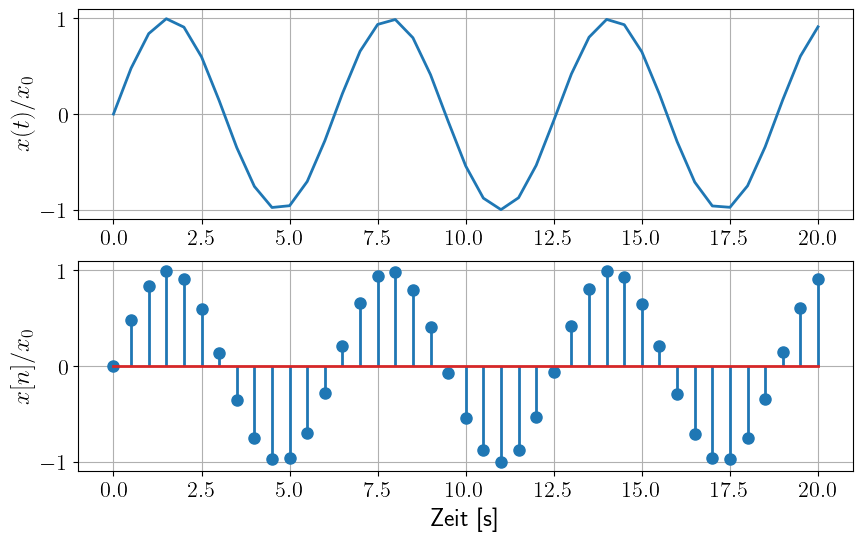

In [93]:
t = np.linspace(0,20,41)
x = np.sin(t)
ax1 = plt.subplot(211)
plt.plot(t,x)
ax1.set_ylabel(r'$x(t)/x_0$')
plt.grid()
ax2 = plt.subplot(212,sharex=ax1)
plt.stem(t,x)
ax2.set_ylabel(r'$x[n]/x_0$')
ax2.set_xlabel('Zeit [s]')
plt.grid()
plt.show()

## Weitere Beispiele für diskrete Signale aus der digitalen Signalverarbeitung

Impulsfolge

\begin{equation}
\delta[n] = \begin{Bmatrix} 1\text{ für }n=0\\0\text{ sonst}\\ \end{Bmatrix}
\end{equation}

und Sprungfolge

\begin{equation}
u[n] = \begin{Bmatrix}1\text{ für }n\geq 0\\0\text{ sonst}\\ \end{Bmatrix}
\end{equation}

*Skizze siehe Tafel*

Sinus- und Kosinusfolge mit der normierten Kreisfrequenz und der Eulerschen Zahl $e = 2,718...$

\begin{equation}
x[n] = \sin(\Omega \cdot n)
\end{equation}

\begin{equation}
x[n] = e^{j\Omega n} = \cos(\Omega \cdot n) + j\cdot \sin(\Omega n)
\end{equation}

## Übungsaufgaben

### Impulsfolgen

Skizzieren Sie die Impulsfolgen $x_1[n] = \delta[n-3]$ und $x_2[n] = \delta[n+2]$ für $n=-5..5$.

*Lösung an der Tafel*

### Sinus- und Kosinusfolgen

Skizzieren Sie die Sinus- und Kosinusfolgen $x_3[n] = \sin(2\pi n/7)$ und $x_4[n]=\cos(n/2)$ für $n=0..10$.

*Lösung an der Tafel*

### Periodisch?

Sind die Folgen $x_3[n]$ und $x_4[n]$ periodisch? Geben Sie ggf. die Perioden an.

*Lösung an der Tafel*

```{bibliography}
:filter: docname in docnames
```